# Customer Churn Analysis

In this exercise we explore the [Telco customer churn dataset](https://community.watsonanalytics.com/wp-content/uploads/2015/03/WA_Fn-UseC_-Telco-Customer-Churn.xlsx).

Refer to the article: https://www.ibm.com/communities/analytics/watson-analytics-blog/predictive-insights-in-the-telco-customer-churn-data-set/

Our goal is to explore the churn dataset and see if we can get some indications about what causes customer churn.

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
telco = pd.read_csv('./data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [39]:
telco.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

Now let's look at the total count

In [35]:
# Total count to churn and non-churn customers
telco['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [14]:
# Group telco by 'Churn' and compute the standard deviation
print(telco.groupby(['Churn']).std())

       SeniorCitizen     tenure  MonthlyCharges
Churn                                          
No          0.334923  24.113777       31.092648
Yes         0.435799  19.531123       24.666053


In [13]:
# Count the number of churners and non-churners by type of contract
print(telco.groupby('Contract')['Churn'].value_counts())

Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1307
                Yes       166
Two year        No       1647
                Yes        48
Name: Churn, dtype: int64


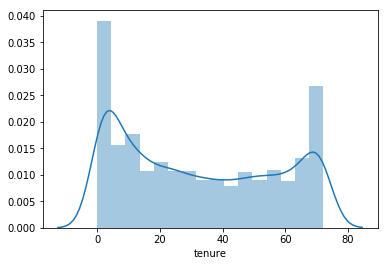

In [21]:
# Let's see the distribution of the some of the features in this dataset
sns.distplot(telco['tenure'])

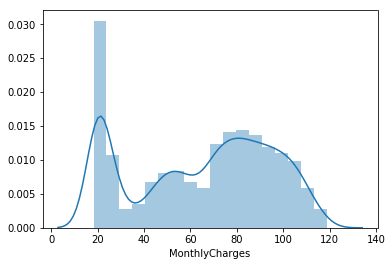

In [23]:
sns.distplot(telco['MonthlyCharges'])

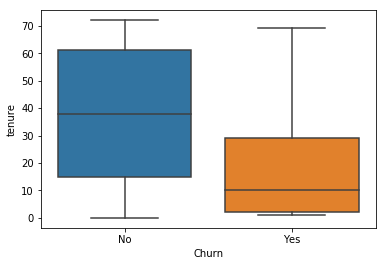

In [24]:
sns.boxplot(y='tenure', x='Churn', data=telco, sym="")

This tells a story that there is considerably less churn among longer term customers

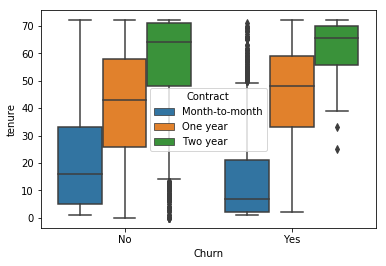

In [20]:
sns.boxplot(x='Churn', y='tenure',  data=telco, hue="Contract")

Well, well! It looks like <b>Month-to-Month customers with lower tenure have a higher churn rate</b>. 

Now let's look at some other features like OnlineSecurity, Type of Internet service and see if they can help predict churn.

## Question: Churn - Does Online Security help prevent churn?

In [30]:
telco.groupby('Churn')['OnlineSecurity'].value_counts()

Churn  OnlineSecurity     
No     No                     2037
       Yes                    1724
       No internet service    1413
Yes    No                     1461
       Yes                     295
       No internet service     113
Name: OnlineSecurity, dtype: int64

## Question:  Is there less Churn amongst customers with Internet Service?

In [29]:
telco.groupby('Churn')['InternetService'].value_counts()

Churn  InternetService
No     DSL                1962
       Fiber optic        1799
       No                 1413
Yes    Fiber optic        1297
       DSL                 459
       No                  113
Name: InternetService, dtype: int64